In [1]:
#colab 용 konlpy 모듈
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-05-01 04:32:13--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-05-01 04:32:14--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc82d93dae220618b9385395b3fe.dl.dropboxusercontent.com/cd/0/get/B7Od8UfMI6DTH9OEkN4tiRyT6L6VHX1QwBbmjgjvijJjIeUd-yFif7E3gpduyeg1MBCWmex4QcREl2UvjE73_vy7VYLWTioLUiN_s6sqnTcTNYP8zIUMOobjRXFlmTyHU-aN88tyyXI0XrERF9QKR0WIBKdg30rEVC3ahqzg3nHqhwZ6nRxAxRLVwDNmaK9AypU/file?dl=1# [following]
--2023-05-01 04:32:14--  https://uc82d93dae220618b9385395b3fe.dl.dropboxusercontent.com/cd/0/get/B7Od8UfMI6DT

       idx                                           title  \
0        1                 보라 데보라 유인나윤현민 로코 장인들의 연애 루저 탈출기   
1        2                          홍김동전 주우재홍진경 극과 극 연애 조언   
2        3                    유퀴즈환승연애 제작진 뭉쳐 대 연애예능 소소연 론칭   
3        4             한혜진 살 차이상사와 비밀 연애 악조건 다 갖고 있다 연애의참견   
4        5                       환승연애  대 리얼리티 제작소년 소녀 연애하다   
...    ...                                             ...   
7446  7447                   서울 코리아오픈 국제휠체어테니스 대회 일간 열전 마쳐   
7447  7448                    한은 국제유가 상방압력 우세  수요회복 수준이 관건   
7448  7449                                  국제 설탕값 년 만에 최고   
7449  7450                     동대구역 광장 공공디자인 국제 디자인 어워즈 수상   
7450  7451  유류세 조정 찬물 끼얹은 국제유가 세수물가 동시타격 세수부족유가상승 고심 깊은 정부   

                                               contents keyword  
0     마이데일리  노한빈 기자  새 오리지널 드라마 보라 데보라연출 이태곤 서민정 극본 ...      연애  
1      예능 홍김동전연출 박인석은 홍진경 김숙 조세호 주우재 우영이 출연해 동전으로 운명...      연애  
2     서울뉴스 윤효정 기자  대들의 연애 리얼리티 소소연이 론칭된다 엔터테인먼트 스트리밍...  

100%|██████████| 7451/7451 [12:25<00:00, 10.00it/s]


기사의 최대 길이 : 6252
기사의 평균 길이 : 366.710374446383


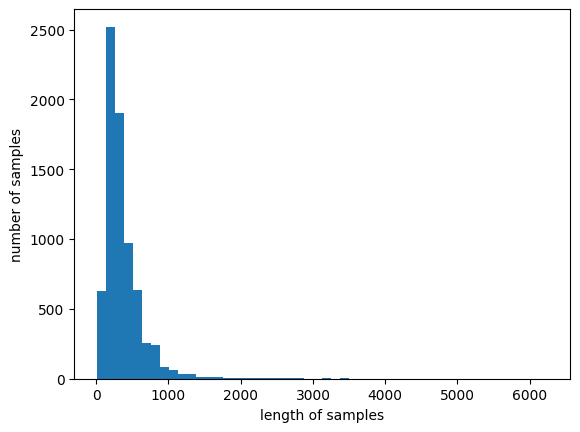

Training: 100%|██████████| 7451/7451 [00:00<00:00, 9460.41it/s]


(19852, 100)


NameError: ignored

In [ ]:
import ssl
import certifi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

train_data = pd.read_csv('/content/sample_data/news.csv')

print(train_data)

# title, contents 값을 document라는 새로운 컬럼으로 생성
train_data['document'] = train_data['title']+' '+train_data['contents']

#keyword 라는 컬럼을 숫자로 매핑하여 labeling 작업 => 별도로 label이라는 컬럼을 생성하여 적용
train_data['label'] = train_data['keyword'].map({'연애': 0, '스포츠': 1, '정치': 2, '국제': 3, '사회': 4, '문화': 5})

# train data 에서 상위 5개 출력
print(train_data[:5])
# 총 리뷰 갯수 확인
print(len(train_data))
# 결측값 확인
print(train_data.isnull().values.any())
# 결측값이 존재하기에 결측값이 존재하는 행을 모두 제거 => NULL 값이 존재하는 Row 모두제거
train_data = train_data.dropna(how='any')
print(len(train_data))

# word2Vec 학습시 사용하고 싶지 않은 단어들인 불용어 제거.
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','불펌','금지','기자']
# okt 형태소 분석기를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []

for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

print('기사의 최대 길이 :',max(len(review) for review in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
'''
 토큰화된 네이버 영화 리뷰 데이터를 학습
 size => 만들어질 워드 벡터의 차원 => 100 * 100
 window => 컨텍스트 윈도우의 크기, 컨텍스트 윈도우는 단어 앞과 뒤에서 몇개 단어를 볼것인지를 정하는 크기임. 
 min_count => 단어 최소 빈도수의 임계치 ( 해당 임계치 보다 적은 단어는 훈련시키지 않음 ) 
 workker => 학습에 사용하는 프로세스 갯수 
 sg => 0 일 경우, CBOW, 1일 경우 Skip-Gram 
'''
model = Word2Vec(sentences=tqdm(tokenized_data, desc="Training"), vector_size=100, window=5, min_count=5, workers=6, sg=0)

model.wv.vectors.shape
# 모델을 review_w2v 이라는 모델명으로 저장
model.wv.save_word2vec_format('review_w2v')
print(model.wv.vectors.shape)

model = KeyedVectors.load_word2vec_format('review_w2v', binary=False)
word_vector = model['축구']

news_vector = []
for word in tokenized_data[0]:
    try:
        news_vector.append(model[word])
    except:
        pass
news_vector = np.array(news_vector)
news_vector = np.mean(news_vector, axis=0)


word_vector = model['축구']
similarity_scores = []
for news_vector in tqdm(news_vectors, desc="Calculating similarity scores"):
    news_vector = np.array(news_vector).reshape(1, -1)
    similarity_score = cosine_similarity(news_vector, word_vector.reshape(1, -1))[0][0]
    similarity_scores.append(similarity_score)

most_similar_news = train_data.iloc[np.argmax(similarity_scores)]
print(most_similar_news['document'])


       idx                                           title  \
0        1                 보라 데보라 유인나윤현민 로코 장인들의 연애 루저 탈출기   
1        2                          홍김동전 주우재홍진경 극과 극 연애 조언   
2        3                    유퀴즈환승연애 제작진 뭉쳐 대 연애예능 소소연 론칭   
3        4             한혜진 살 차이상사와 비밀 연애 악조건 다 갖고 있다 연애의참견   
4        5                       환승연애  대 리얼리티 제작소년 소녀 연애하다   
...    ...                                             ...   
7446  7447                   서울 코리아오픈 국제휠체어테니스 대회 일간 열전 마쳐   
7447  7448                    한은 국제유가 상방압력 우세  수요회복 수준이 관건   
7448  7449                                  국제 설탕값 년 만에 최고   
7449  7450                     동대구역 광장 공공디자인 국제 디자인 어워즈 수상   
7450  7451  유류세 조정 찬물 끼얹은 국제유가 세수물가 동시타격 세수부족유가상승 고심 깊은 정부   

                                               contents keyword  
0     마이데일리  노한빈 기자  새 오리지널 드라마 보라 데보라연출 이태곤 서민정 극본 ...      연애  
1      예능 홍김동전연출 박인석은 홍진경 김숙 조세호 주우재 우영이 출연해 동전으로 운명...      연애  
2     서울뉴스 윤효정 기자  대들의 연애 리얼리티 소소연이 론칭된다 엔터테인먼트 스트리밍...  

100%|██████████| 7451/7451 [11:55<00:00, 10.41it/s]


리뷰의 최대 길이 : 6252
리뷰의 평균 길이 : 367.8655214065226


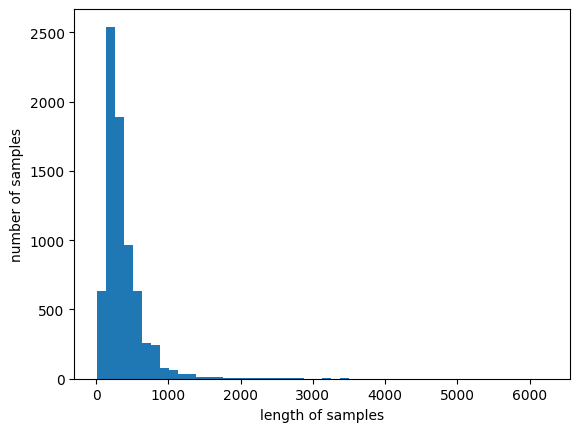

Training: 100%|██████████| 7451/7451 [00:01<00:00, 5345.03it/s]


(19853, 100)
[('데보라', 0.5226202607154846), ('사연', 0.5153796076774597), ('고민', 0.5011841654777527), ('박태환', 0.49686574935913086), ('유인나', 0.48751285672187805), ('이야기', 0.4733099341392517), ('보라', 0.47272175550460815), ('로코', 0.46857333183288574), ('양세형', 0.46784496307373047), ('섭외', 0.4546035826206207)]


In [ ]:
import ssl
import certifi
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
from gensim.models import Word2Vec


train_data = pd.read_csv('/content/sample_data/news.csv')

print(train_data)

# title, contents 값을 document라는 새로운 컬럼으로 생성
train_data['document'] = train_data['title']+' '+train_data['contents']

#keyword 라는 컬럼을 숫자로 매핑하여 labeling 작업 => 별도로 label이라는 컬럼을 생성하여 적용
train_data['label'] = train_data['keyword'].map({'연애': 0, '스포츠': 1, '정치': 2, '국제': 3, '사회': 4, '문화': 5})

# train data 에서 상위 5개 출력
print(train_data[:5])
# 총 리뷰 갯수 확인
print(len(train_data))
# 결측값 확인
print(train_data.isnull().values.any())
# 결측값이 존재하기에 결측값이 존재하는 행을 모두 제거 => NULL 값이 존재하는 Row 모두제거
train_data = train_data.dropna(how='any')
print(len(train_data))

# word2Vec 학습시 사용하고 싶지 않은 단어들인 불용어 제거.
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','불펌','금지']
# okt 형태소 분석기를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []

for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
'''
 토큰화된 뉴스 데이터를 학습
 size => 만들어질 워드 벡터의 차원 => 100 * 100
 window => 컨텍스트 윈도우의 크기, 컨텍스트 윈도우는 단어 앞과 뒤에서 몇개 단어를 볼것인지를 정하는 크기임. 
 min_count => 단어 최소 빈도수의 임계치 ( 해당 임계치 보다 적은 단어는 훈련시키지 않음 ) 
 workker => 학습에 사용하는 프로세스 갯수 
 sg => 0 일 경우, CBOW, 1일 경우 Skip-Gram => word2vec 알고리즘의 형식
'''
model = Word2Vec(sentences=tqdm(tokenized_data, desc="Training"), vector_size=100, window=5, min_count=5, workers=6, sg=0)

model.wv.vectors.shape
# 모델을 review_w2v 이라는 모델명으로 저장
model.wv.save_word2vec_format('review_w2v')
print(model.wv.vectors.shape)
print(model.wv.most_similar("연애"))

In [ ]:
w2v_model = KeyedVectors.load_word2vec_format('review_w2v')


In [ ]:
import numpy as np

def get_doc_vector(doc):
    doc_vector = np.zeros(100)
    cnt = 0
    for word in doc:
        if word in w2v_model.wv:
            doc_vector += w2v_model.wv[word]
            cnt += 1
    if cnt != 0:
        doc_vector /= cnt
    return doc_vector

In [ ]:
doc_vectors = []
for doc in tqdm(tokenized_data, desc="Calculating doc vectors"):
    doc_vector = get_doc_vector(doc)
    doc_vectors.append(doc_vector)

train_data['doc_vector'] = doc_vectors

Calculating doc vectors:   0%|          | 0/7451 [00:00<?, ?it/s]


AttributeError: ignored

       idx                                           title  \
0        1                 보라 데보라 유인나윤현민 로코 장인들의 연애 루저 탈출기   
1        2                          홍김동전 주우재홍진경 극과 극 연애 조언   
2        3                    유퀴즈환승연애 제작진 뭉쳐 대 연애예능 소소연 론칭   
3        4             한혜진 살 차이상사와 비밀 연애 악조건 다 갖고 있다 연애의참견   
4        5                       환승연애  대 리얼리티 제작소년 소녀 연애하다   
...    ...                                             ...   
7446  7447                   서울 코리아오픈 국제휠체어테니스 대회 일간 열전 마쳐   
7447  7448                    한은 국제유가 상방압력 우세  수요회복 수준이 관건   
7448  7449                                  국제 설탕값 년 만에 최고   
7449  7450                     동대구역 광장 공공디자인 국제 디자인 어워즈 수상   
7450  7451  유류세 조정 찬물 끼얹은 국제유가 세수물가 동시타격 세수부족유가상승 고심 깊은 정부   

                                               contents keyword  
0     마이데일리  노한빈 기자  새 오리지널 드라마 보라 데보라연출 이태곤 서민정 극본 ...      연애  
1      예능 홍김동전연출 박인석은 홍진경 김숙 조세호 주우재 우영이 출연해 동전으로 운명...      연애  
2     서울뉴스 윤효정 기자  대들의 연애 리얼리티 소소연이 론칭된다 엔터테인먼트 스트리밍...  

100%|██████████| 7451/7451 [07:28<00:00, 16.62it/s]


리뷰의 최대 길이 : 6252
리뷰의 평균 길이 : 366.56730640182525


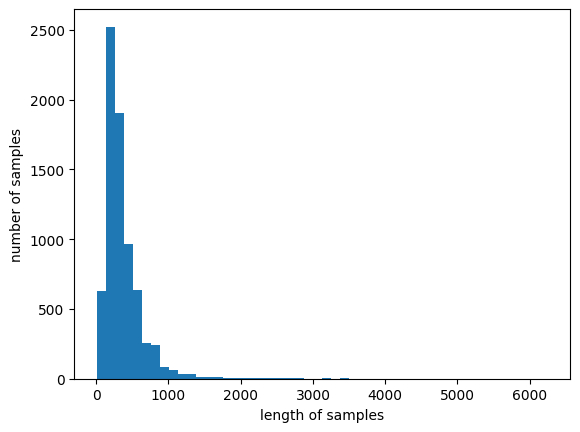

Training: 100%|██████████| 7451/7451 [00:00<00:00, 11474.75it/s]


(19850, 100)
[('김성현', 0.612798273563385), ('학비', 0.605656087398529), ('닮은꼴', 0.5943961143493652), ('송강', 0.586642861366272), ('연예계', 0.5810325145721436), ('땐', 0.5805876851081848), ('단역', 0.5713731050491333), ('대좌', 0.5601493716239929), ('김민정', 0.5431010723114014), ('미팅', 0.5405374765396118)]


In [2]:
import ssl
import certifi
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
from gensim.models import Word2Vec

train_data = pd.read_csv('/content/sample_data/news.csv')

print(train_data)

# title, contents 값을 document라는 새로운 컬럼으로 생성
train_data['document'] = train_data['title']+' '+train_data['contents']

#keyword 라는 컬럼을 숫자로 매핑하여 labeling 작업 => 별도로 label이라는 컬럼을 생성하여 적용
train_data['label'] = train_data['keyword'].map({'연애': 0, '스포츠': 1, '정치': 2, '국제': 3, '사회': 4, '문화': 5})

# train data 에서 상위 5개 출력
print(train_data[:5])
# 총 리뷰 갯수 확인
print(len(train_data))
# 결측값 확인
print(train_data.isnull().values.any())
# 결측값이 존재하기에 결측값이 존재하는 행을 모두 제거 => NULL 값이 존재하는 Row 모두제거
train_data = train_data.dropna(how='any')
print(len(train_data))

# word2Vec 학습시, 학습에 사용하고 싶지 않은 단어들인 불용어 제거 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','불펌','금지','기사','기자','속보']
# okt 형태소 분석기를 사용한 토큰화 작업
okt = Okt()

# 토큰화된 데이터를 저장하기 위한 리스트.
tokenized_data = []

'''
word2vec 알고리즘은 기본적으로 각 단어의 등장 빈도와 함께 문맥 정보를 이용하여 벡터를 생성함. 
word2vec은 문자열 데이터를 입력으로 받기 때문에, 입력 텍스트를 먼저 토큰화하여 개별 단어 단위로 분할해야 함. 토큰화 작업은 입력 텍스트를 단어, 구두점, 공백 등의 단위로 분리하는 작업을 말함. 즉, 학습에 필요한 단어 형태를 사전에 만들어 둔다고 보면됨. 
토큰화 작업을 하지 않으면 학습시, 텍스트를 한 덩어리로 받아들이기 때문에 단어 간의 구분이 없어져서 각 단어의 벡터 표현을 학습할 수 없음.
그렇기에 Word2vec 알고리즘을 사용할 때는 먼저 토큰화 작업을 수행하여 각 단어를 개별적으로 인식할 수 있도록 해야함.
실질적인 학습을 통해 생성되는 모델도, 토큰화 작업 + 불용어 제거 + 단어간의 벡터값으로 변환하는게 다임.
'''
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # okt 모듈을 통한 토큰화 작업
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 위에서 명시한 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
'''
 토큰화된 뉴스 데이터를 학습
 size => 만들어질 워드 벡터의 차원 => 100 * 100
 window => 컨텍스트 윈도우의 크기, 컨텍스트 윈도우는 단어 앞과 뒤에서 몇개 단어를 볼것인지를 정하는 크기임. 
 min_count => 단어 최소 빈도수의 임계치 ( 해당 임계치 보다 적은 단어는 훈련시키지 않음 ) 
 workker => 학습에 사용하는 프로세스 갯수 
 sg => 0 일 경우, CBOW, 1일 경우 Skip-Gram => word2vec 알고리즘의 형식
'''
model = Word2Vec(sentences=tqdm(tokenized_data, desc="Training"), vector_size=100, window=5, min_count=5, workers=6, sg=1)

model.wv.vectors.shape
# 모델을 review_w2v 이라는 모델명으로 저장
model.wv.save_word2vec_format('review_w2v')
print(model.wv.vectors.shape)
print(model.wv.most_similar("연예인")) # 연예인이라는 키워드를 입력했을 때, 학습된 모델에서 비슷한 결과를 보이는 벡터값을 표기 



In [3]:
from gensim.models import KeyedVectors
from konlpy.tag import Okt

In [4]:
n_train_data = pd.read_csv('/content/sample_data/news.csv')

In [5]:
# 사전 학습된 모델 로드
model = KeyedVectors.load_word2vec_format('review_w2v')

In [6]:

# 테스트할 문서의 index 값 
target_idx = 3
n_train_data = pd.read_csv('/content/sample_data/news.csv')
target_document = n_train_data.loc[n_train_data['idx'] == target_idx]['title'].item() + " " + n_train_data.loc[n_train_data['idx'] == target_idx]['contents'].item()

# 코사인 유사도 계산 => 유사도 측정은 코사인 뿐 아니라 자카드, 피어슨등 다양한 유사도 함수를 사용해도 무관. 
okt = Okt()
similarities = []
for idx, row in tqdm(n_train_data.iterrows(), total=n_train_data.shape[0]):
    document = row['title'] + " " + row['contents']
    similarity = model.n_similarity(okt.morphs(target_document), okt.morphs(document))
    similarities.append((idx, similarity))
    

# 유사도가 높은 상위 5개 추천
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]
recommendations = [idx for idx, _ in similarities]
print("Recommended indices:", recommendations)
# 상위 5개 문서의 유사도 출력
print("Top 5 similarities:")
for idx, sim in similarities:
    print(f"Document {idx} - Similarity: {sim}")

100%|██████████| 7451/7451 [16:26<00:00,  7.55it/s]

Recommended indices: [2, 4, 5, 6, 12]
Top 5 similarities:
Document 2 - Similarity: 1.0
Document 4 - Similarity: 0.9876203536987305
Document 5 - Similarity: 0.9846416115760803
Document 6 - Similarity: 0.9832316637039185
Document 12 - Similarity: 0.9740170836448669


In [8]:
#입력한 문서와 비슷한 idx 번호 추출 
print("Recommended indices:", recommendations)
# 추출한 idx 문서의 title, contents, keyword 값 추출 
for idx in recommendations:
  row = n_train_data.iloc[int(idx)]
  title = row['title']
  keyword = row['keyword']
  contents = row['contents']
  print(f"제목: {title} \n, 카테고리: {keyword} \n, 본문:{contents} \n")

Recommended indices: [2, 4, 5, 6, 12]
제목: 유퀴즈환승연애 제작진 뭉쳐 대 연애예능 소소연 론칭 
, 카테고리: 연애 
, 본문:서울뉴스 윤효정 기자  대들의 연애 리얼리티 소소연이 론칭된다 엔터테인먼트 스트리밍 서비스 티빙은 일 새 오리지널 예능 프로그램 소년 소녀 연애하다이하 소소연를 론칭한다고 밝혔다 소소연은 다양한 재능을 지닌 전국의 예고생들이 만나 예술의 원천인 사랑이라는 감정을 통해 성장하면서 각자의 뮤즈를 찾아가는 과정을 담아낸 하이틴 성장 리얼리티소소연은 아날로그 감성이 살아있는 자연에 모인 예고생들이 캠코더와 필름 카메라로 여름을 기록하고 영감을 주고받으며 사랑과 우정을 배워가는 과정을 담는다 한여름 밤의 찬란하고 뜨거운 대의 계절에 소년 소녀들은 서로에게 음악 그림 춤의 영감을 선사하는 뮤즈가 되어준다 소소연의 해사한 소년 소녀들을 통해 누구나 마음속에 가지고 있는 청춘영화 잊고 살았던 나의 대를 떠올리며 추억과 공감을 불러일으킬 것이다한편 소소연은 독특한 구성과 뛰어난 영상미로 호평받았던 스트리트 푸드 파이터의 박희연 와 연애 리얼리티 신드롬을 일으킨 환승연애 제작진 이희선 의 간판 프로그램 유 퀴즈 온 더 블럭 이언주 작가가 의기투합한 프로젝트로  과 이언주 작가가 설립한 제작사 블랙페이퍼가 제작에 참여해 기대를 모은다 그동안 쌓아온 탄탄한 노하우를 바탕으로 새로운 관점의 하이틴 성장 리얼리티 소소연을 기획한 제작진은 찬란하게 빛나는 대 시절의 추억을 돌아보게 만드는 한편 순수  몰입감을 선사하며 보는 이들의 감성을 자극할 예정이다올해 하반기 방송 예정  

제목: 환승연애  대 리얼리티 제작소년 소녀 연애하다 
, 카테고리: 연애 
, 본문:리포트이예은 기자 티빙이 대 예고생들의 풋풋하고 설레는 하이틴 성장 리얼리티 공개를 앞두고 있다국내  플랫폼 티빙은 일 소년 소녀 연애하다이하 소소연을 오는 하반기에 공개한다고 발표했다소소연은 다양한 재능을 지닌 전국의 예고생들이 만나 예술의 원천인 사랑이란 감정을 통해